# This is "Logistic Regression" example which predict the give picture is of cat or not

1. numpy - NumPy contains array data and basic operations such as sorting, indexing, etc                                       
2. the give picture is of cta or notscipy - SciPy is a library that uses NumPy for more mathematical functions                 
3. matplotlib  -  Matplotlib is a plotting library for the Python                                                  
4. h5py - The h5py package is a Pythonic interface to the HDF5 binary data format                                            
(HDF5 is a unique technology suite that makes possible the management of extremely large and complex data collections)         
5. lr_utils - this package contain training and testing data

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset         # this package contain training and testing data

%matplotlib inline

## Loading data ##



- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).


each image shape = (64,64,3)  where height = 64, width = 64, color channel(RGB) = 3


**totla training examples/images = 209                                                         
totla testing examples/images = 50**

In [106]:
# Loading the data 
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

**Let's read iamage form dataset**



index = 66, it's a 'not cat' picture.


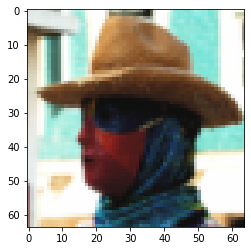

In [45]:
# Example of a picture
index = 66                        #give index of any image which wanna convert from hdf5 formate to array and than image formate
plt.imshow(train_set_x_orig[index])   #ploting pixels
object = str(train_set_y[:, index])   # getting label of the picture from "train_set_y"
#print(object)
print ("index = {}, it's a 'cat' picture.".format(index) if object == "[1]" else  "index = {}, it's a 'not cat' picture.".format(index) )

**Now let's find number of training and testing examples/images we have**

- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image i.e 64*64)

**train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3)** 

**test_set_x_orig is a numpy-array of shape (m_test, num_px, num_px, 3)** 

where,                         
m_train = number of traing examples,                         
m_test = number of testing examples,                      
num_px = height,                                
num_px = width,                                     
3 = color channels(RGB)

In [47]:

m_train = train_set_x_orig.shape[0]     # m_train
m_test = test_set_x_orig.shape[0]       # m_test
num_px = train_set_x_orig.shape[1]      # height = width

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape(images): " + str(train_set_x_orig.shape))
print ("train_set_y shape(labels): " + str(train_set_y.shape))
print ("test_set_x shape(images): " + str(test_set_x_orig.shape))
print ("test_set_y shape(labels): " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape(images): (209, 64, 64, 3)
train_set_y shape(labels): (1, 209)
test_set_x shape(images): (50, 64, 64, 3)
test_set_y shape(labels): (1, 50)


**if wanna see how matrix look:** run following    

for (209, 64, 64, 3) : print(train_set_x_orig) 

for (1, 209) : print(train_set_y_orig)       

for (50, 64, 64, 3) : print(test_set_x_orig)  

for (1, 50) : print(test_set_y_orig)                

# Now let's flattern the image's which are input's for the Neural Network##

**Here Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px  ∗  num_px  ∗  3, 1)  
i.e 12288"rows" and 1 "column"                  
64 * 64 * 3 = height * width * RGB                             
number of images = number of images in training/ teting dataset**   

a.reshape(a,-1).T

where,                  
- a = I/p matrix              
- .T = transpose of matrix
- -1 = it means irrespective of column which gives single column matrix i.e vector     
- .reashape = it is a python function 

In [65]:

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))  # cheaking transpose is correctly done or not

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [70]:
print(train_set_x_flatten)

[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]


**One common preprocessing step in machine learning is to center and standardize your dataset**

for center and standardize picture datasets, just divide every row of the dataset by 255 (the maximum value of a pixel channel)

In [71]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

# now lest's start with creating Model

**General Architecture of the learning algorithm/ Neural Network:**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

Key steps: In this exercise, you will carry out the following steps:

- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

**Building the parts of our algorithm**                        

The main steps for building a Neural Network are:

Define the model structure (such as number of input features)
Initialize the model's parameters
Loop:
Calculate current loss (forward propagation)
Calculate current gradient (backward propagation)
Update parameters (gradient descent)
You often build 1-3 separately and integrate them into one function we call model().

**functions use for Network :**

1. $sigmoid = \frac{1}{1 + e^{-(w^T x + b)}}$
2. Initializing parameter using **" np.zeros() "** function
3. Forward and Backward propagation
4. Optimization

# 1.  Sigmoid :

Sigmoid is an activation function use at end of the Network

Sigmoid gives us values between "1" & "0" 

AT OUTPUT, if value more than 0.5 then it's 1 i.e predicted as "cat"; else "0" i.e "not cat" 

In [77]:
def sigmoid(z):
   
    s = 1/(1+ np.exp(-z))     # np.exp() is a exponential function
    return s

#sigmoid(2)

**for cross cheaking of sigmoid value check below link**
    
https://keisan.casio.com/exec/system/15157249643325

# 2.  Initializing parameter

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

where,
  
size of w is same as X && b= 0
     
**set all element's/ cell's of "w" and "b" matrix to "0"**

In [78]:
def initialize_with_zeros(dim):
   
    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [79]:
#initialize_with_zeros(2)

(array([[0.],
        [0.]]), 0)

# 3. Forward and Backward propagation

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Backword Propagation

- $ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$
- $ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$

In [81]:
def propagate(w, b, X, Y):
 
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.matmul(w.T,X)+b)                                    # compute activation
    cost = -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                             # compute cost

    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m)*np.matmul(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# 4. Optimization

- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

The goal is to learn $w$ and $b$ by minimizing the cost function $J$


In [84]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w-(learning_rate*dw) 
        b =  b-(learning_rate*db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# Let's make predictions

The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [85]:
def predict(w, b, X):
   
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.matmul(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i]< 0.5 :
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
        pass
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

# Using all above function create finall model which gives us prediction for given picture

In [86]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost = False):
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    #error = predicted - actual
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

now let's use our training and testing "data set for prediction

In [87]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


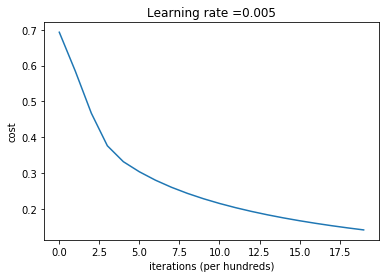

In [101]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

index = 45, it's a 'not cat' picture.


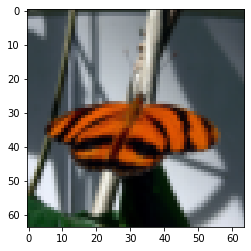

In [100]:
# Example of a picture that was wrongly classified.
index = 45
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("index = {}, it's a 'cat' picture.".format(index) if object == "[1]" else  "index = {}, it's a 'not cat' picture.".format(index) )

**Note :**
    
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate

**try different learning rate will give you different prediction result's**

learning rate is: 0.01
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.823921
Cost after iteration 200: 0.418944
Cost after iteration 300: 0.617350
Cost after iteration 400: 0.522116
Cost after iteration 500: 0.387709
Cost after iteration 600: 0.236254
Cost after iteration 700: 0.154222
Cost after iteration 800: 0.135328
Cost after iteration 900: 0.124971
Cost after iteration 1000: 0.116478
Cost after iteration 1100: 0.109193
Cost after iteration 1200: 0.102804
Cost after iteration 1300: 0.097130
Cost after iteration 1400: 0.092043
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.591289
Cost after iteration 200: 0.555796
Cost after iteration 300: 0.528977
Cost after iteration 400: 0.506881
Cost after iteration 500: 0.487880
Cost after iteration 600: 0.471108
Cost after iteration 700: 0.456046
Cost after iteration 800: 0.442

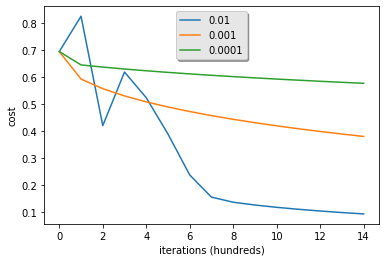

In [103]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()